In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['type'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Plotting the data with sepal width and length

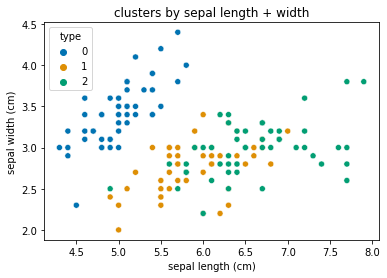

In [4]:
sns.scatterplot(df['sepal length (cm)'], df['sepal width (cm)'], hue = df['type'], palette='colorblind')
plt.title('clusters by sepal length + width')
plt.show()

## Plotting the data with petal width and length

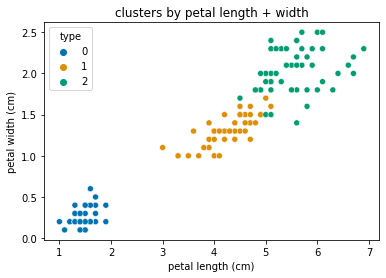

In [5]:
sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue = df['type'], palette='colorblind')
plt.title('clusters by petal length + width')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 0:4].values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [8]:
X_scaled.mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

## Plotting the data with 2 principal components

In [9]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
prin_comps2 = pca2.fit_transform(X_scaled)

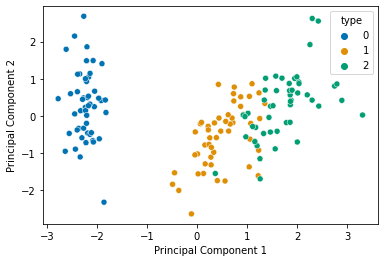

In [10]:
sns.scatterplot(prin_comps2[:,0], prin_comps2[:,1], hue = df.type, palette='colorblind')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Plotting the data with 1 principal components

In [11]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
prin_comps1 = pca1.fit_transform(X_scaled)

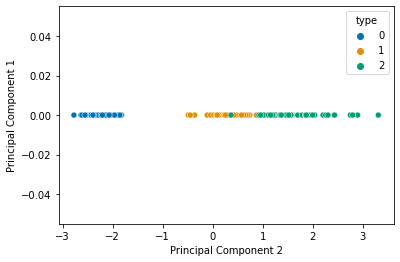

In [12]:
sns.scatterplot(prin_comps1[:,0], np.zeros((150)), hue = df.type, palette='colorblind')
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()